# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df[:5]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

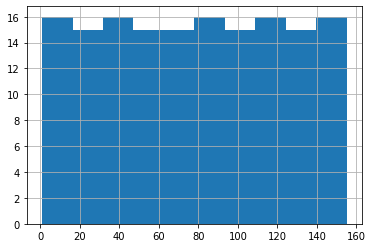

In [4]:
df['Freedom'].hist()
# равномерное распределение

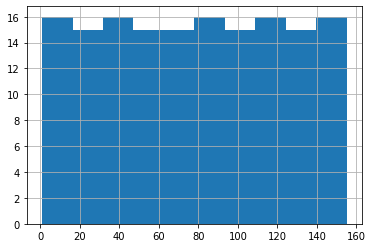

In [5]:
df['Positive affect'].hist()
# равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
dff = df['Freedom']
dff.dropna(inplace=True)
dff_list = list(dff)
dff_list = sorted(dff_list)

elements_count = len(dff_list)

if elements_count > 0:
    
    # медиана
    middle = elements_count//2
    if elements_count%2 == 0:
        print(f'Медиана: {(dff_list[middle] + dff_list[middle-1])/2}')
    else:
        print(f'Медиана: {dff_list[middle]}')

    print(f'Медиана (statistics): {statistics.median(dff_list)}')

    # мода
    if len(dff.unique()) == len(dff):
        print('Набор данных не имеет моды')
    else:
        print(f'Мода (statistics): {statistics.mode(dff)}')
    
    # математическое ожидание
    avg = np.sum(dff_list)/len(dff_list)
    print(f'Математическое ожидание: {avg}')
    print(f'Математическое ожидание (statistics): {statistics.median(df.Freedom)}')
    
    # стандартное отклонение
    stdev = 0
    for i in dff:
        stdev += (i-avg)**2
    stdev = (stdev / (len(dff_list)-1))**0.5
    print(f'Стандартное отклонение: {stdev}')
    print(f'Стандартное отклонение (statistics): {statistics.pstdev(df.Freedom)}')
        
    # дисперсия
    print(f'Дисперсия: {stdev**2}')
    print(f'Дисперсия (statistics): {statistics.pvariance(dff)}')

# минимум и максимум
print(f'Минимум: {min(df.Freedom)}')
print(f'Максимум: {max(df.Freedom)}')
    
# выбросы - нет
print(df.Freedom.isnull().sum())

#размах
print(f'Размах: {max(df.Freedom) - min(df.Freedom)}')

Медиана: 78.0
Медиана (statistics): 78.0
Набор данных не имеет моды
Математическое ожидание: 78.0
Математическое ожидание (statistics): 78.0
Стандартное отклонение: 44.88875137492688
Стандартное отклонение (statistics): 44.74371464239419
Дисперсия: 2015.0000000000002
Дисперсия (statistics): 2002.0
Минимум: 1.0
Максимум: 155.0
0
Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

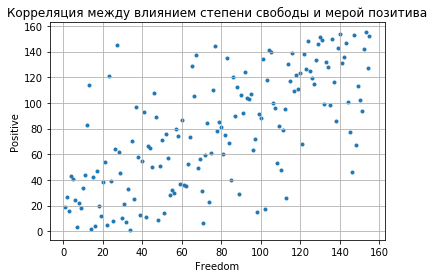

In [7]:
# графически
df_scatter = df[['Freedom', 'Positive affect']]
df_scatter = df_scatter.dropna()
Freedom = df_scatter['Freedom']
Positive = df_scatter['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive')
plt.title('Корреляция между влиянием степени свободы и мерой позитива')
plt.grid(True)
plt.scatter(Freedom, Positive, marker='.')

In [8]:
# математически
corr, p_value = sts.pearsonr(Freedom, Positive)
print(f'Коэффициент корреляции Пирсона: {corr}')

Коэффициент корреляции Пирсона: 0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [9]:
dfc = df_scatter['Freedom'] - statistics.mean(df_scatter['Freedom'])

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(np.array(dfc).reshape(-1,1))
df_norm = pd.DataFrame(np_scaled)
df_norm

,0
0,-0.948052
1,-0.935065
2,-0.974026
3,-0.922078
4,-0.766234
5,-0.870130
6,-0.883117
7,-0.909091
8,-0.896104
9,-0.675325


Построить матрицу корреляций для всех колонок таблицы

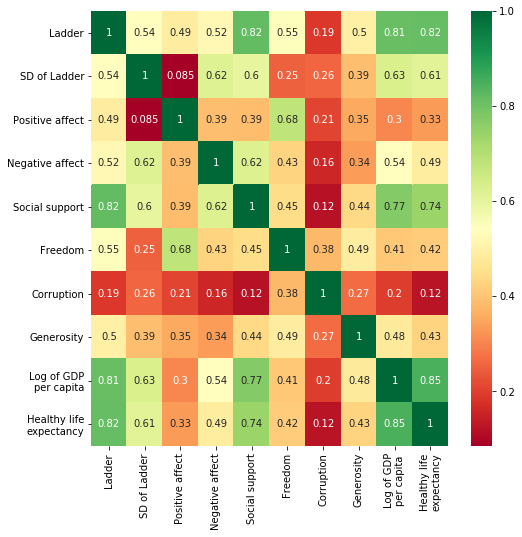

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Загрузить следующую таблицу: 

In [11]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

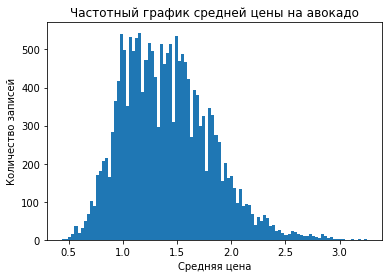

In [12]:
plt.hist(df['AveragePrice'], 100)
plt.xlabel('Средняя цена')
plt.ylabel('Количество записей')
plt.title('Частотный график средней цены на авокадо')
plt.grid(False)
plt.show()

# нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

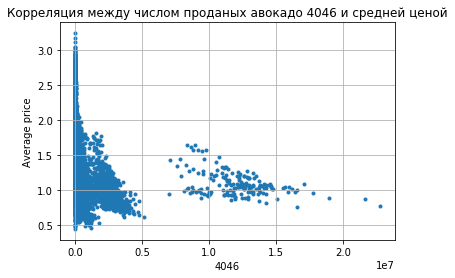

In [13]:
df_scatter = df[['4046', 'AveragePrice']]
df_scatter = df_scatter.dropna()
col_1 = df_scatter['4046']
col_2 = df_scatter['AveragePrice']
plt.xlabel('4046')
plt.ylabel('Average price')
plt.title('Корреляция между числом проданых авокадо 4046 и средней ценой')
plt.grid(True)
plt.scatter(col_1, col_2, marker='.')

In [14]:
corr, p_value = sts.pearsonr(df_scatter['4046'], df_scatter['AveragePrice'])
print(corr)

# получается отрицательная корреляция, когда рост средней цены приводит к уменьшению продаж

-0.20831704848788477
